In [3]:
pip install opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


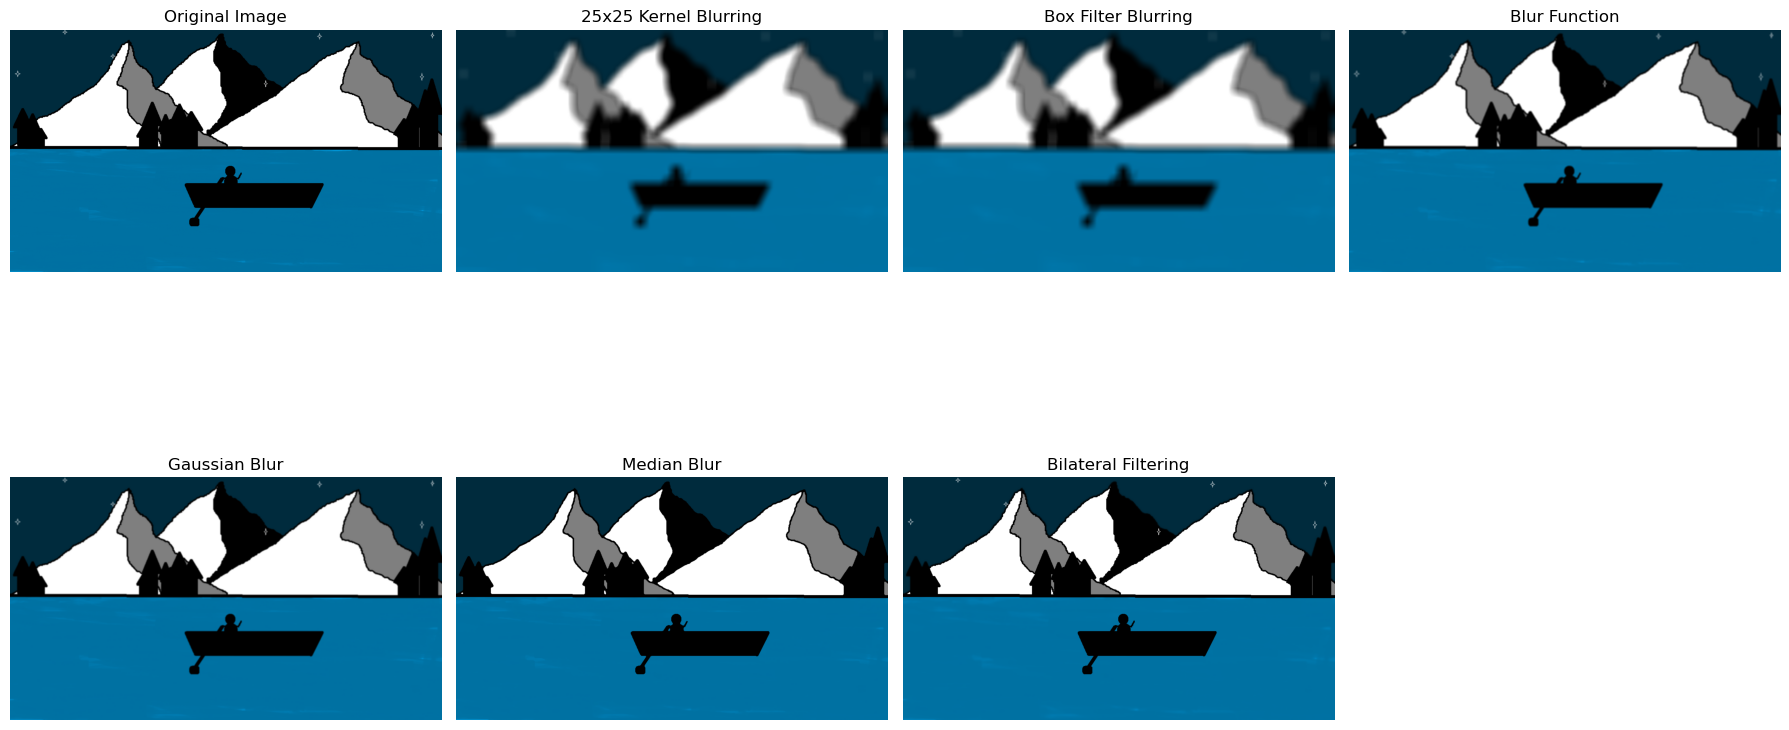

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the file path for the image
file_path = r"C:\Users\Student\Pictures\Camera Roll\Untitled.png"

# Read the image using OpenCV
img = cv2.imread(file_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or path is incorrect.")
else:
    # Convert the image from BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create a 25x25 kernel for blurring
    kernel_25 = np.ones((25, 25), np.float32) / 625.0

    # Apply the kernel to the image using filter2D
    output_kernel = cv2.filter2D(img, -1, kernel_25)

    # Box filter and blur function blurring
    output_blur = cv2.blur(img, (25, 25))
    output_box = cv2.boxFilter(img, -1, (5, 5))

    # Gaussian Blur
    output_gaus = cv2.GaussianBlur(img, (5, 5), 0)

    # Median Blur (reduction of noise)
    output_med = cv2.medianBlur(img, 5)

    # Bilateral filtering (reduction of noise + preserving of edges)
    output_bil = cv2.bilateralFilter(img, 9, 75, 75)

    # Convert all output images from BGR to RGB for Matplotlib
    output_images = [output_kernel, output_blur, output_box, output_gaus, output_med, output_bil]
    output_titles = ['25x25 Kernel Blurring', 'Box Filter Blurring', 'Blur Function', 'Gaussian Blur', 'Median Blur', 'Bilateral Filtering']
    output_images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in output_images]

    # Display the original and blurred images using Matplotlib
    plt.figure(figsize=(18, 10))
    
    # Original image
    plt.subplot(2, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')  # Hide axis

    # Display all the processed images
    for i, (img_rgb, title) in enumerate(zip(output_images_rgb, output_titles), start=2):
        plt.subplot(2, 4, i)
        plt.imshow(img_rgb)
        plt.title(title)
        plt.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()
